- This notebook provides a comprehensive overview of how to develop screening guidelines of wettability alteration with surfactants in carbonate reservoirs.
- It outlines where surfactant treatments could be effectively applied in carbonate reservoirs.
- The screening guidelines are developed using descriptive statistical analysis methods.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cbook

# 1. Dataset information

In [2]:
# import dataset
df = pd.read_excel("Guideline.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ExpID        290 non-null    object 
 1   RockRegion   241 non-null    object 
 2   RockField    244 non-null    object 
 3   RockType     270 non-null    object 
 4   RockSource   262 non-null    object 
 5   K_Type       268 non-null    object 
 6   K_Mean       290 non-null    float64
 7   Poro         286 non-null    float64
 8   So           290 non-null    float64
 9   ExpTemp      290 non-null    float64
 10  OilRegion    222 non-null    object 
 11  OilType      290 non-null    object 
 12  ExpVisco     183 non-null    float64
 13  Gravity      281 non-null    float64
 14  AN           188 non-null    float64
 15  BN           124 non-null    float64
 16  AS_Conc      194 non-null    float64
 17  ConType      290 non-null    object 
 18  ConTDS       288 non-null    float64
 19  ConMg2+ 

# 2. Rock properties

## 2.1 Rock type

In [3]:
# rock type
# the first column in the crosstable is 'count'
pd.crosstab(index= df['RockType'], columns="count")

col_0,count
RockType,
Dolomite,134
Limestone,136


## 2.2 Rock source

In [4]:
# rock source
pd.crosstab(index= df['RockSource'], columns="count")

col_0,count
RockSource,
Formation,147
Outcrop,115


In [5]:
pd.crosstab(df.RockSource, df.RockType)

RockType,Dolomite,Limestone
RockSource,,
Formation,108,19
Outcrop,26,89


## 2.3 Temperature

(10.0, 110.0)

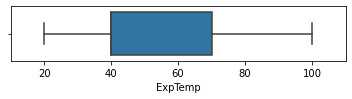

In [7]:
plt.figure(figsize=(6,1))
I = sns.boxplot(x = df['ExpTemp'], orient = "h")
plt.xlim(10, 110)

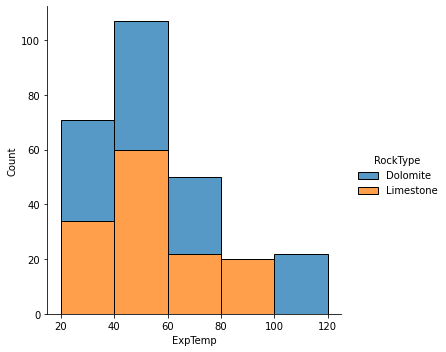

In [8]:
sns.displot(x="ExpTemp", bins=[20, 40, 60, 80, 100, 120], 
            hue="RockType", multiple="stack", data= df)

## 2.4 Porosity

(0.0, 60.0)

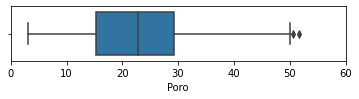

In [9]:
plt.figure(figsize=(6,1))
I = sns.boxplot(x = df['Poro'], orient = "h")
plt.xlim(0, 60)

All cores with porosity larger than 31.3% are from outcrop chalk samples from the Stevns Klint near
Copenhagen, Denmark. And these cores have permeability 1-7 mD. All these cores are investigated by UiS.

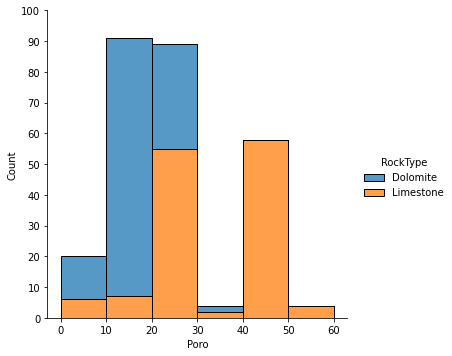

In [10]:
sns.displot(x= "Poro", bins= [0, 10, 20, 30, 40, 50, 60], 
            hue= "RockType", multiple= "stack", data= df)

# set y axis every range is 10
from matplotlib.pyplot import MultipleLocator
y_major_locator=MultipleLocator(10)
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)

plt.ylim(0, 100)
plt.show()

## 2.5 Starting oil saturation

(20.0, 120.0)

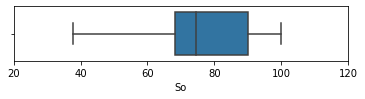

In [11]:
plt.figure(figsize = (6, 1))
Soi = sns.boxplot(x = 'So', orient = "h", data = df)
plt.xlim(20, 120)

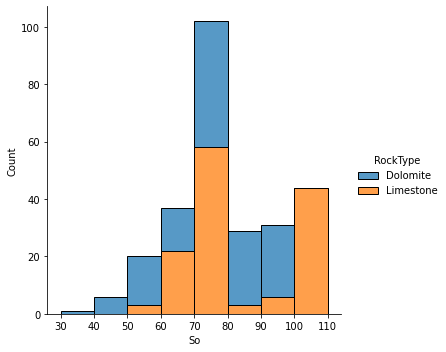

In [12]:
sns.displot(x="So", bins=[30, 40, 50, 60, 70, 80, 90, 100, 110], 
            hue="RockType", multiple="stack", data= df)

## 2.6 Permeability

(0.0, 1600.0)

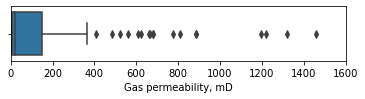

In [13]:
df_GasK= df[df['K_Type']=='Gas']

# Gas K, boxplot
plt.figure(figsize=(6,1))
GasKBox= sns.boxplot(x='K_Mean', data= df_GasK)
plt.xlabel('Gas permeability, mD')
plt.xlim(0, 1600)

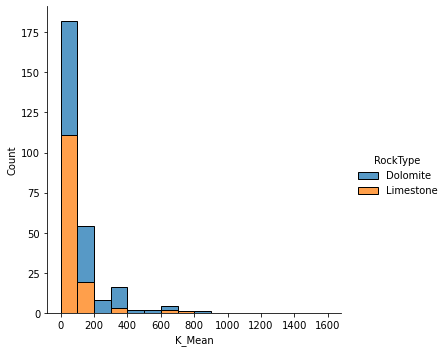

In [14]:
sns.displot(x="K_Mean", 
            bins=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600], 
            hue="RockType", multiple="stack", data= df)

# 3. Oil properties

## 3.1 Oil source

In [16]:
# oil source
# the first column in the crosstable is 'count'
pd.crosstab(index= df['OilType'], columns="count")

col_0,count
OilType,
Commercial oil,13
Dead oil,181
Simulated oil,96


## 3.2. Oil viscosity

(0.0, 30.0)

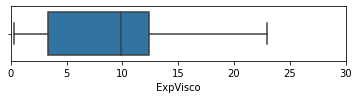

In [17]:
plt.figure(figsize=(6,1))
I = sns.boxplot(x = df['ExpVisco'], orient = "h")
plt.xlim(0, 30)

### 3.2.1 Based on oil type

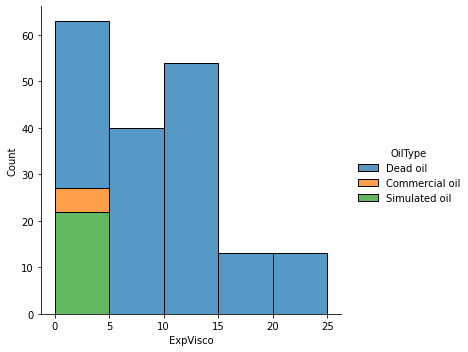

In [17]:
sns.displot(x= "ExpVisco", 
            bins= [0, 5, 10, 15, 20, 25], 
            hue= "OilType", 
            multiple= "stack", 
            data= df)

### 3.2.2 Based on rock type

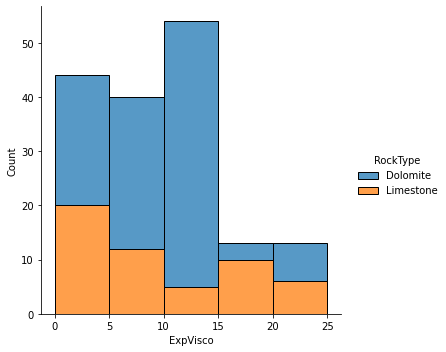

In [18]:
sns.displot(x= "ExpVisco", 
            bins= [0, 5, 10, 15, 20, 25], 
            hue= "RockType", 
            multiple= "stack", 
            data= df)

## 3.3 API Gravity

(20.0, 80.0)

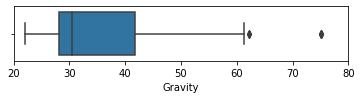

In [19]:
plt.figure(figsize=(6,1))
I = sns.boxplot(x = df['Gravity'], orient = "h")
plt.xlim(20, 80)

### 3.3.1 Based on oil type

(20.0, 80.0)

<Figure size 432x216 with 0 Axes>

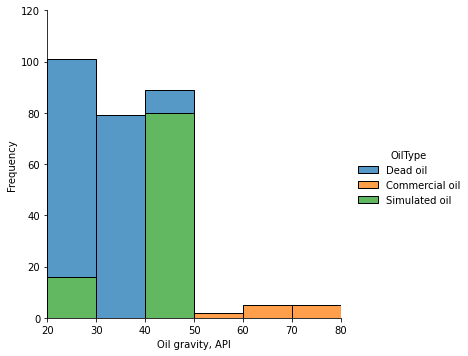

In [20]:
plt.figure(figsize = (6, 3))
sns.displot(x= "Gravity", bins= [20, 30, 40, 50, 60, 70, 80], 
            hue= "OilType", multiple= "stack", data= df)

plt.xlabel('Oil gravity, API')
plt.ylabel('Frequency')
plt.ylim(0, 120)
plt.xlim(20, 80)

### 3.3.2 Based on rock type

(20.0, 80.0)

<Figure size 432x216 with 0 Axes>

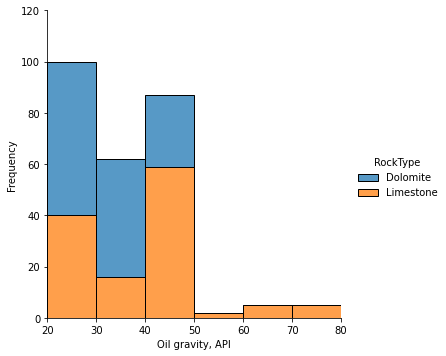

In [21]:
plt.figure(figsize = (6, 3))
sns.displot(x= "Gravity", bins= [20, 30, 40, 50, 60, 70, 80], 
            hue= "RockType", multiple= "stack", data= df)

plt.xlabel('Oil gravity, API')
plt.ylabel('Frequency')
plt.ylim(0, 120)
plt.xlim(20, 80)

## 3.4 Acid number

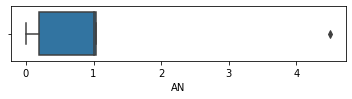

In [22]:
plt.figure(figsize=(6,1))
I = sns.boxplot(x = df['AN'], orient = "h")
# plt.xlim(0, 5)

### 3.4.1 Based on oil type

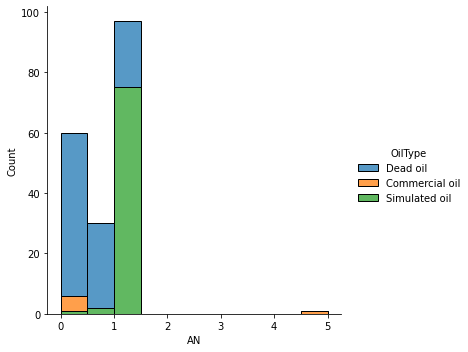

In [23]:
sns.displot(x= "AN", 
            bins= [0, 0.5, 1.0, 1.5, 2.0,
                   2.5, 3.0, 3.5, 4.0,
                   4.5, 5.0], 
            hue= "OilType", 
            multiple= "stack", 
            data= df)

### 3.4.2 Based on rock type

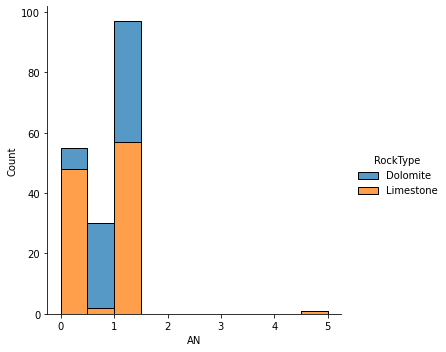

In [24]:
sns.displot(x= "AN", 
            bins= [0, 0.5, 1.0, 1.5, 2.0,
                   2.5, 3.0, 3.5, 4.0,
                   4.5, 5.0],
            hue= "RockType", 
            multiple= "stack", 
            data= df)

## 3.5 Asphaltene concentration

(0.0, 12.0)

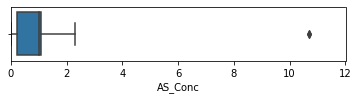

In [26]:
plt.figure(figsize=(6,1))
I = sns.boxplot(x = df['AS_Conc'], orient = "h")
plt.xlim(0, 12)

### 3.5.1 Based on oil type

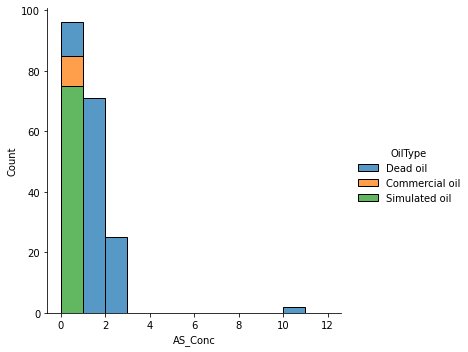

In [27]:
sns.displot(x= "AS_Conc", 
            bins= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
            hue= "OilType", 
            multiple= "stack", 
            data= df)

Very often, a positive correlation between the AN and the amount of asphaltenes is observed for different oils, but the functional acid groups need not be part of the asphaltene fraction (Skauge et al., 1999). Likewise, in our case, we have
an oil with relatively high asphaltenic content and a relatively low AN.(JPSE_28(2000)111_121)

### 3.5.2 Based on rock type

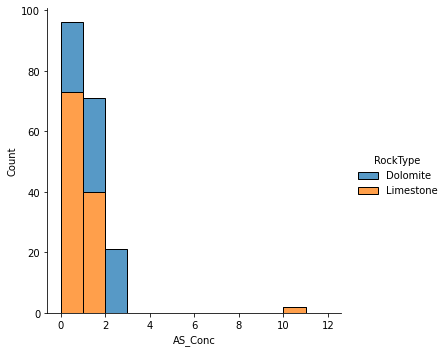

In [28]:
sns.displot(x= "AS_Conc", 
            bins= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
            hue= "RockType", 
            multiple= "stack", 
            data= df)

# 4 Connate water properties

## 4.1 Connate water type

In [32]:
# connate brine type
# the first column in the crosstable is 'count'

pd.crosstab(index= df['ConType'], columns="count")

col_0,count
ConType,
DW,6
FW,13
SFW,160
SSW,18
SW,81
SW(KCl& CaCl2),5
SW(KCl),3
SW(Na2CO3),1
SW(NaCl),3


## 4.2 Connate water TDS

(0.0, 300.0)

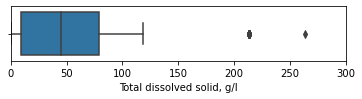

In [33]:
# Connate water TDS, boxplot

plt.figure(figsize=(6, 1))
ConTDS = sns.boxplot(x = 'ConTDS', orient = "h", data= df)
plt.xlabel('Total dissolved solid, g/l')
plt.xlim(0, 300)

(0.0, 200.0)

<Figure size 432x216 with 0 Axes>

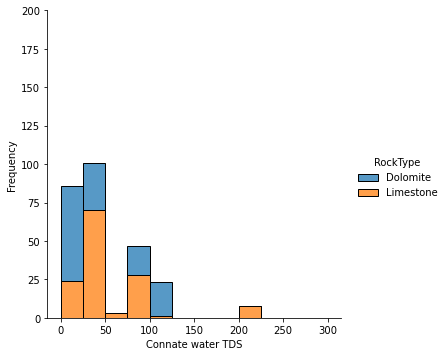

In [34]:
plt.figure(figsize = (6, 3))
sns.displot(x= "ConTDS", 
            bins= [0, 25, 50, 75, 100, 125, 
                   150, 175, 200, 225, 250, 300],
            hue= "RockType", 
            multiple= "stack", 
            data= df)

plt.xlabel('Connate water TDS')
plt.ylabel('Frequency')
plt.ylim(0, 200)
# plt.xlim(20, 80)

## 4.3 Connate water divalent cations

Text(0.5, 0, 'Connate water divalent cations concentration, g/l')

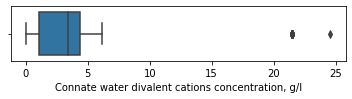

In [35]:
# Connate water Mg2+ and Ca2+, boxplot

plt.figure(figsize=(6,1))
ConMg = sns.boxplot(x = 'ConDivalent', orient = "h", data= df)
plt.xlabel('Connate water divalent cations concentration, g/l')
# plt.xlim(0, 5)

(0.0, 200.0)

<Figure size 432x216 with 0 Axes>

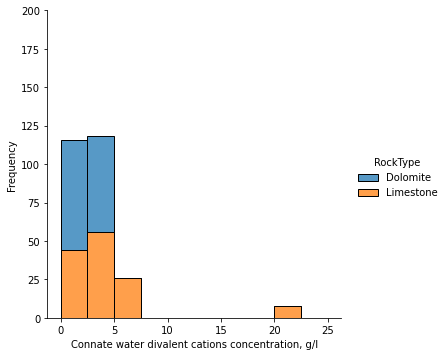

In [37]:
plt.figure(figsize = (6, 3))
sns.displot(x= "ConDivalent", 
            bins= [0, 2.5, 5.0, 7.5, 10, 
                   12.5, 15, 17.5, 20,
                   22.5, 25],
            hue= "RockType", 
            multiple= "stack", 
            data= df)

plt.xlabel('Connate water divalent cations concentration, g/l')
plt.ylabel('Frequency')
plt.ylim(0, 200)
# plt.xlim(20, 80)

# 5. Guidelines table

In [38]:
# overall
df.describe().T

,count,mean,std,min,25%,50%,75%,max
K_Mean,290.0,120.375138,213.259528,0.04000,4.500000,31.150,150.00,1458.000
Poro,286.0,25.132063,12.638576,3.10000,15.350000,22.900,29.25,51.700
So,290.0,77.349388,15.159966,37.66282,68.322465,74.390,90.00,100.000
ExpTemp,290.0,52.409962,25.803713,20.00000,40.000000,40.000,70.00,100.000
ExpVisco,183.0,9.571530,6.202856,0.33000,3.300000,9.900,12.40,23.000
Gravity,281.0,35.037687,9.346076,22.00000,28.200000,30.400,41.69,75.170
AN,188.0,0.705851,0.480836,0.00000,0.200000,1.000,1.04,4.500
BN,124.0,0.680565,0.726871,0.00000,0.010000,0.130,1.17,1.830
AS_Conc,194.0,0.909366,1.213290,0.00000,0.230000,1.000,1.09,10.700
ConTDS,288.0,58.751753,58.384117,0.00000,9.405000,44.920,79.42,263.720
